In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

In [2]:
sns.set_style('whitegrid')

Download the dataset here:

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability

In [3]:
df = pd.read_csv('./data/water_potability.csv')#.fillna(df.mean())

In [4]:
df = df.fillna(df.mean())

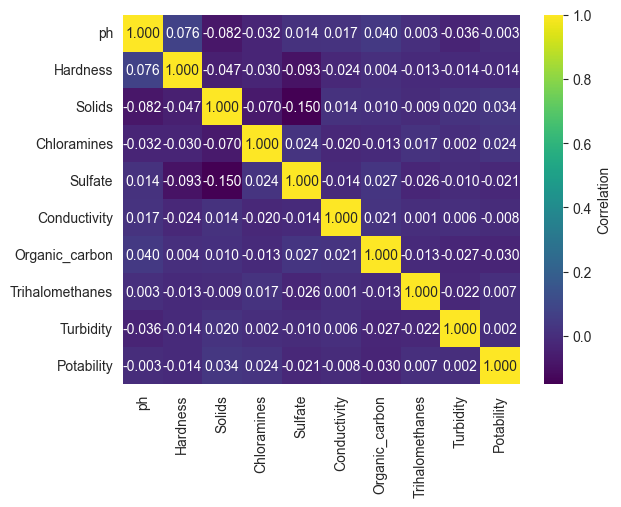

In [5]:
c = df.corr()

sns.heatmap(c, cmap='viridis', annot=True, fmt='.3f', cbar_kws=dict(label='Correlation'))

plt.savefig('./plots/2023-11-17_corr.png', dpi=150, bbox_inches='tight')

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

lreg = LogisticRegression(class_weight='balanced')
lreg.fit(X_train, y_train)

lreg.score(X_test, y_test)

0.49694749694749696

In [7]:
y_pred = lreg.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix

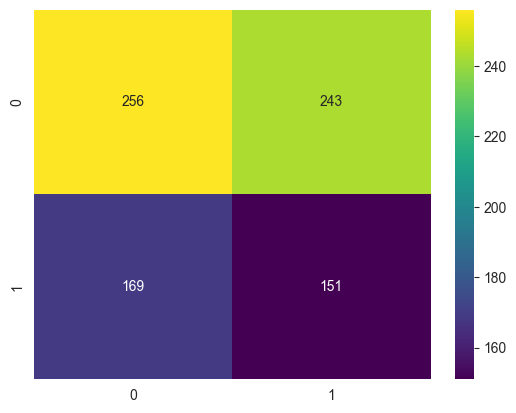

In [9]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)),
            cmap='viridis', annot=True, fmt='.0f',
           )

plt.savefig('./plots/2023-11-17_confmat.png', dpi=150, bbox_inches='tight')